<a href="https://colab.research.google.com/github/siddharthdey27/Logistic-regression/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Heart Disease using Logistic Regression

This notebook will guide you through the process of building and training a logistic regression model to predict heart disease.

## Load Data

Load the dataset from the provided CSV file into a pandas DataFrame.

In [27]:
import pandas as pd

df = pd.read_csv('/content/heart_cleveland_upload.csv')

display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Explore and Preprocess Data

Inspect the data for missing values, outliers, and appropriate data types. Perform necessary preprocessing steps like handling missing values, encoding categorical variables, and scaling numerical features.

In [28]:
# Display information about the DataFrame
df.info()

# Display descriptive statistics of the DataFrame
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000



Missing values per column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns (assuming 'condition' is the target)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply preprocessing to the DataFrame
X = df.drop('condition', axis=1)
y = df['condition']

X_processed = preprocessor.fit_transform(X)

print("Shape of preprocessed data:", X_processed.shape)

Shape of preprocessed data: (297, 28)


## Split Data

Split the dataset into training and testing sets to evaluate the model's performance.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (237, 28)
Shape of X_test: (60, 28)
Shape of y_train: (237,)
Shape of y_test: (60,)


## Build and Train Model

Build a logistic regression model using a machine learning library and train it on the training data.

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Evaluate Model

Evaluate the trained model on the testing data using appropriate metrics like accuracy, precision, recall, and F1-score.

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8000
Precision: 0.7667
Recall: 0.8214
F1-score: 0.7931


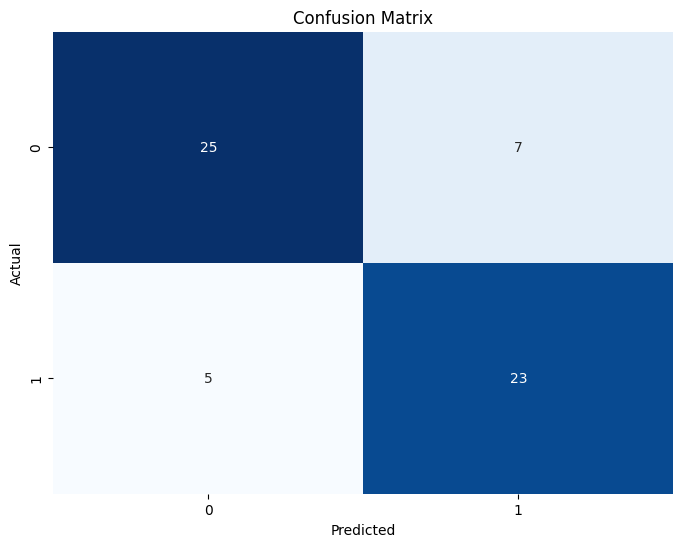

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Testing Model##

In [36]:
# Get user input for each feature
user_data = {}
user_data['age'] = int(input("Enter your age: "))
user_data['sex'] = int(input("Enter your sex (0 for female, 1 for male): "))
user_data['cp'] = int(input("Enter your chest pain type (0-3): "))
user_data['trestbps'] = int(input("Enter your resting blood pressure (trestbps): "))
user_data['chol'] = int(input("Enter your serum cholesterol (chol): "))
user_data['fbs'] = int(input("Enter your fasting blood sugar (0 or 1): "))
user_data['restecg'] = int(input("Enter your resting electrocardiographic results (0-2): "))
user_data['thalach'] = int(input("Enter your maximum heart rate achieved (thalach): "))
user_data['exang'] = int(input("Enter exercise induced angina (0 for no, 1 for yes): "))
user_data['oldpeak'] = float(input("Enter ST depression induced by exercise relative to rest (oldpeak): "))
user_data['slope'] = int(input("Enter the slope of the peak exercise ST segment (0-2): "))
user_data['ca'] = int(input("Enter number of major vessels (0-3) colored by fluoroscopy (ca): "))
user_data['thal'] = int(input("Enter thal (0-2): "))

# Convert user input to a pandas DataFrame
user_df = pd.DataFrame([user_data])

# Preprocess the user input data using the same preprocessor
user_processed = preprocessor.transform(user_df)

# Make a prediction using the trained model
prediction = model.predict(user_processed)

# Output the prediction
if prediction[0] == 1:
    print("Based on the provided details, the model predicts you are likely to have heart disease.")
else:
    print("Based on the provided details, the model predicts you are unlikely to have heart disease.")

Enter your age: 40
Enter your sex (0 for female, 1 for male): 1
Enter your chest pain type (0-3): 2
Enter your resting blood pressure (trestbps): 200
Enter your serum cholesterol (chol): 293
Enter your fasting blood sugar (0 or 1): 1
Enter your resting electrocardiographic results (0-2): 2
Enter your maximum heart rate achieved (thalach): 119
Enter exercise induced angina (0 for no, 1 for yes): 1
Enter ST depression induced by exercise relative to rest (oldpeak): 0.5
Enter the slope of the peak exercise ST segment (0-2): 1
Enter number of major vessels (0-3) colored by fluoroscopy (ca): 2
Enter thal (0-2): 0
Based on the provided details, the model predicts you are likely to have heart disease.
